In [52]:
import pandas as pd

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('carsales.csv')

In [55]:
df.shape

(105, 2)

In [56]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [57]:
df.tail()

,Month,Sales
100,1968-08,16722
101,1968-09,14385
102,1968-10,21342
103,1968-11,17180
104,1968-12,14577


In [58]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [59]:
df.head(3)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


In [60]:
df.tail(3)

,Month,Sales
102,1968-10,21342
103,1968-11,17180
104,1968-12,14577


In [61]:
dt_df = pd.date_range(start='1960-01-01',end='1968-12-01',freq='ME')
dt_df = pd.DataFrame(dt_df,columns=['date'])

In [62]:
dt_df.head(3)

,date
0,1960-01-31
1,1960-02-29
2,1960-03-31


In [63]:
def get_date(x):
    d = str(x).split('-')[:-1]
    d.append('01')
    final_dt = '-'.join(d)
    return final_dt

In [64]:
dt_df['date'] = dt_df['date'].apply(lambda x: get_date(x))

In [65]:
dt_df.head(3)

,date
0,1960-01-01
1,1960-02-01
2,1960-03-01


In [66]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    107 non-null    object
dtypes: object(1)
memory usage: 988.0+ bytes


In [67]:
dt_df['date'] = pd.to_datetime(dt_df['date'])
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    107 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 988.0 bytes


In [68]:
dt_df.head(3)

,date
0,1960-01-01
1,1960-02-01
2,1960-03-01


In [69]:
df.shape, dt_df.shape

((105, 2), (107, 1))

In [70]:
# Convert Month to datetime if not already
df['Month'] = pd.to_datetime(df['Month'])

# Compare and find missing dates
missing_months = dt_df[~dt_df['date'].isin(df['Month'])]
print(missing_months)

         date
12 1961-01-01
13 1961-02-01
14 1961-03-01


In [71]:
df['Month'] = pd.to_datetime(df['Month'])

In [72]:
merged_df = dt_df.merge(df,left_on=['date'],right_on=['Month'],how='left')

In [73]:
merged_df.shape

(107, 3)

In [74]:
merged_df.isnull().sum()

date     0
Month    3
Sales    3
dtype: int64

In [75]:
merged_df[merged_df['Month'].isnull()]

,date,Month,Sales
12,1961-01-01,NaT,NaN
13,1961-02-01,NaT,NaN
14,1961-03-01,NaT,NaN


In [76]:
merged_df.head(16)

,date,Month,Sales
0,1960-01-01,1960-01-01,6550.0
1,1960-02-01,1960-02-01,8728.0
2,1960-03-01,1960-03-01,12026.0
3,1960-04-01,1960-04-01,14395.0
4,1960-05-01,1960-05-01,14587.0
5,1960-06-01,1960-06-01,13791.0
6,1960-07-01,1960-07-01,9498.0
7,1960-08-01,1960-08-01,8251.0
8,1960-09-01,1960-09-01,7049.0
9,1960-10-01,1960-10-01,9545.0


In [77]:
merged_df.fillna(method='bfill').head(16)

C:\Users\hp\AppData\Local\Temp\ipykernel_18848\934070526.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='bfill').head(16)


,date,Month,Sales
0,1960-01-01,1960-01-01,6550.0
1,1960-02-01,1960-02-01,8728.0
2,1960-03-01,1960-03-01,12026.0
3,1960-04-01,1960-04-01,14395.0
4,1960-05-01,1960-05-01,14587.0
5,1960-06-01,1960-06-01,13791.0
6,1960-07-01,1960-07-01,9498.0
7,1960-08-01,1960-08-01,8251.0
8,1960-09-01,1960-09-01,7049.0
9,1960-10-01,1960-10-01,9545.0


In [78]:
merged_df.fillna(method='ffill').head(16)

C:\Users\hp\AppData\Local\Temp\ipykernel_18848\1852222485.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill').head(16)


,date,Month,Sales
0,1960-01-01,1960-01-01,6550.0
1,1960-02-01,1960-02-01,8728.0
2,1960-03-01,1960-03-01,12026.0
3,1960-04-01,1960-04-01,14395.0
4,1960-05-01,1960-05-01,14587.0
5,1960-06-01,1960-06-01,13791.0
6,1960-07-01,1960-07-01,9498.0
7,1960-08-01,1960-08-01,8251.0
8,1960-09-01,1960-09-01,7049.0
9,1960-10-01,1960-10-01,9545.0


In [79]:
merged_df['Sales'].mean(),merged_df['Sales'].median()

(14742.759615384615, 14235.5)

In [80]:
merged_df.ffill(inplace=True)

In [81]:
merged_df.head(16)

,date,Month,Sales
0,1960-01-01,1960-01-01,6550.0
1,1960-02-01,1960-02-01,8728.0
2,1960-03-01,1960-03-01,12026.0
3,1960-04-01,1960-04-01,14395.0
4,1960-05-01,1960-05-01,14587.0
5,1960-06-01,1960-06-01,13791.0
6,1960-07-01,1960-07-01,9498.0
7,1960-08-01,1960-08-01,8251.0
8,1960-09-01,1960-09-01,7049.0
9,1960-10-01,1960-10-01,9545.0


In [82]:
final_df = merged_df[['date','Sales']]

In [83]:
final_df.head(16)

,date,Sales
0,1960-01-01,6550.0
1,1960-02-01,8728.0
2,1960-03-01,12026.0
3,1960-04-01,14395.0
4,1960-05-01,14587.0
5,1960-06-01,13791.0
6,1960-07-01,9498.0
7,1960-08-01,8251.0
8,1960-09-01,7049.0
9,1960-10-01,9545.0


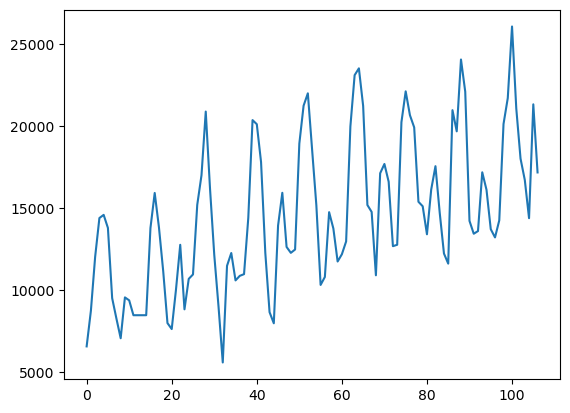

In [84]:
plt.plot(final_df['Sales'])

In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    107 non-null    datetime64[ns]
 1   Sales   107 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [86]:
final_df['year'] = final_df['date'].dt.year

In [87]:
final_df.head(4)

,date,Sales,year
0,1960-01-01,6550.0,1960
1,1960-02-01,8728.0,1960
2,1960-03-01,12026.0,1960
3,1960-04-01,14395.0,1960


In [88]:
final_df[final_df['year']==1960]

,date,Sales,year
0,1960-01-01,6550.0,1960
1,1960-02-01,8728.0,1960
2,1960-03-01,12026.0,1960
3,1960-04-01,14395.0,1960
4,1960-05-01,14587.0,1960
5,1960-06-01,13791.0,1960
6,1960-07-01,9498.0,1960
7,1960-08-01,8251.0,1960
8,1960-09-01,7049.0,1960
9,1960-10-01,9545.0,1960


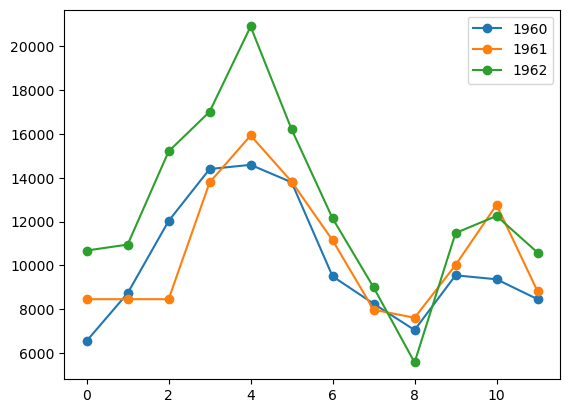

In [89]:
plt.plot(final_df[final_df['year']==1960]['Sales'].values,label='1960',marker='o')
plt.plot(final_df[final_df['year']==1961]['Sales'].values,label='1961',marker='o')
plt.plot(final_df[final_df['year']==1962]['Sales'].values,label='1962',marker='o')
plt.legend()
plt.show()

In [90]:
# All three years show a similar seasonal pattern — rising sales in spring, peaking around April–May, and dropping by fall.
# Yearly Comparison:

# 1962 had the strongest peak (~21,000+ cars).

# 1960 had the lowest overall sales.

# December bounce: All years show a small uptick toward the end of the year.

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
datapoints = adfuller(final_df['Sales'])

In [93]:
datapoints

(-0.897770179667512,
 0.7887058425426522,
 12,
 94,
 {'1%': -3.5019123847798657,
  '5%': -2.892815255482889,
  '10%': -2.583453861475781},
 1666.7525962525992)

In [94]:
labels = ['test_parameters','p-value','lags-used','dataobs']

In [95]:
d = dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -0.897770179667512,
 'p-value': 0.7887058425426522,
 'lags-used': 12,
 'dataobs': 94}

In [96]:
if(d['p-value']>0.05):
    print("Accept the Null Hypothesis")
    print("The time series is non-stationary in nature")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary in nature")

Accept the Null Hypothesis
The time series is non-stationary in nature


In [97]:
final_df.head(4)

,date,Sales,year
0,1960-01-01,6550.0,1960
1,1960-02-01,8728.0,1960
2,1960-03-01,12026.0,1960
3,1960-04-01,14395.0,1960


In [98]:
final_df['lag3'] =  final_df['Sales'].shift(3)
final_df.head()

,date,Sales,year,lag3
0,1960-01-01,6550.0,1960,NaN
1,1960-02-01,8728.0,1960,NaN
2,1960-03-01,12026.0,1960,NaN
3,1960-04-01,14395.0,1960,6550.0
4,1960-05-01,14587.0,1960,8728.0


In [99]:
final_df['diff_3'] = final_df['Sales'] - final_df['Sales'].shift(3)
final_df.head()

,date,Sales,year,lag3,diff_3
0,1960-01-01,6550.0,1960,NaN,NaN
1,1960-02-01,8728.0,1960,NaN,NaN
2,1960-03-01,12026.0,1960,NaN,NaN
3,1960-04-01,14395.0,1960,6550.0,7845.0
4,1960-05-01,14587.0,1960,8728.0,5859.0


In [103]:
datapoints = adfuller(final_df['diff_3'].dropna())
labels = ['test_parameters','p-value','lags-used','dataobs']
d = dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -4.269776607452937,
 'p-value': 0.0005009009477838491,
 'lags-used': 10,
 'dataobs': 93}

In [101]:
if(d['p-value']>0.05):
    print("Accept the Null Hypothesis")
    print("The time series is non-stationary in nature")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary in nature")

Reject the null hypothesis
The time series is stationary in nature
